# Global Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
import gc
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = np.loadtxt('LORENZ.DAT')
data = np.array(data).flatten()

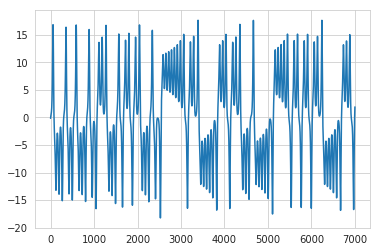

In [3]:
plt.plot(data[0:7000])

In [6]:
# delay, dimension
t, d = 17, 5

# create d-dimensional data
lagged = []

for i in range(0, d):
    lagged.append(np.roll(data, -t*i)[:-t*d])
    
lagged = np.array(lagged).T
lagged.shape

(16299, 5)

In [5]:
# calculate 1-d distance, (x, 0)
b = np.vstack((lagged[:, 0], np.zeros(len(lagged[:, 0]))))
pdist = distance.pdist(b.T) # pairwise distances
dist_mat = distance.squareform(pdist) # convert matrix

del pdist
gc.collect()
dist_mat.shape

(16299, 16299)

In [ ]:
"""
To-Do

1. sort 
2. calc Rd and Rd+1
3. calc ratio of distance e
"""